In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.1MB/s 
     |████████████████████████████████| 9.5MB 12.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
csv_path = Path("/content/drive/MyDrive/Group_Project_2/AMZN_GOOG_MSFT_historical_data.csv")
stocks_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
stocks_df.head()

,AMZN,MSFT,GOOGL
Date,,,
2016-01-04,636.73,54.790,759.41
2016-01-05,633.79,55.050,761.52
2016-01-06,632.81,54.075,759.30
2016-01-07,607.84,52.190,741.00
2016-01-08,607.23,52.330,730.92


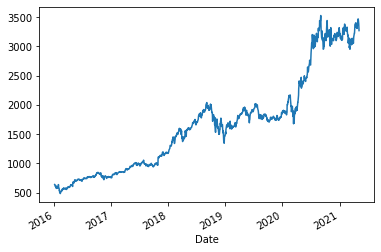

In [ ]:
stocks_df['AMZN'].plot()

In [ ]:
stocks_flat = stocks_df.pct_change()
stocks_flat.head()

,AMZN,MSFT,GOOGL
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,-0.004617,0.004745,0.002778
2016-01-06,-0.001546,-0.017711,-0.002915
2016-01-07,-0.039459,-0.034859,-0.024101
2016-01-08,-0.001004,0.002683,-0.013603


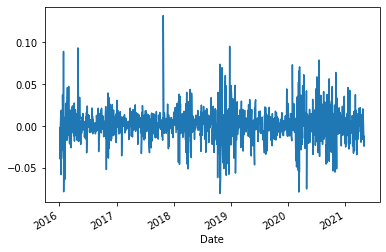

In [ ]:
stocks_flat['AMZN'].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest= adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. P-Value: ", dftest[1])
  print("3. Num of Lags: ", dftest[2])
  print("4. Num of Observations used for ADF Regression and Critical values Calculation: ", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
    print("\t",key, ": ", val)

In [ ]:
ad_test(stocks_flat['AMZN'])

MissingDataError: ignored

In [ ]:
amzn_df = stocks_flat.drop(columns=['MSFT', 'GOOGL'])
msft_df = stocks_flat.drop(columns=['AMZN', 'GOOGL'])
googl_df = stocks_flat.drop(columns=['MSFT', 'AMZN'])

In [ ]:
amzn_df = amzn_df.loc['2019-09-01': '2021-05-03']
amzn_df.head()

,AMZN
Date,
2019-09-03,0.007499
2019-09-04,0.006119
2019-09-05,0.022367
2019-09-06,-0.003922
2019-09-09,-0.001211


In [ ]:
amzn_trim = amzn_df.copy()
amzn_trim = amzn_trim.loc['2019-09-01': '2021-04-19']
amzn_trim.tail()

,AMZN
Date,
2021-04-13,0.006099
2021-04-14,-0.019294
2021-04-15,0.013343
2021-04-16,0.006014
2021-04-19,-0.007434


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


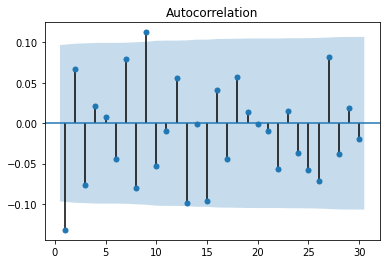

In [ ]:
plotacf = plot_acf(amzn_trim.AMZN, zero=False, lags= 30)

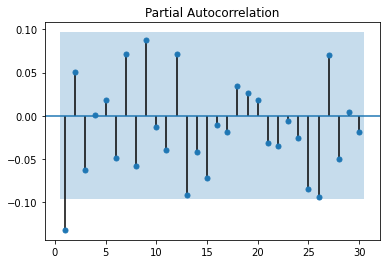

In [ ]:
pafcplot = plot_pacf(amzn_trim.AMZN, zero=False, lags= 30)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

ModuleNotFoundError: ignored